In [4]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import requests
import gmaps
import os
import pprint
from api_keys import g_key

In [5]:
#read csv file
Covid_county=pd.read_csv('Resources/Counties.csv')
Covid_county.count()

date      991917
county    991917
state     991917
fips      982704
cases     991917
deaths    970582
dtype: int64

In [6]:
#Filter dataframe to North Carolina and also to Mecklenburg County
NC_County = Covid_county[Covid_county.state == "North Carolina"]


In [7]:
NC_County.head(5)

,date,county,state,fips,cases,deaths
483,2020-03-03,Wake,North Carolina,37183.0,1,0.0
520,2020-03-04,Wake,North Carolina,37183.0,1,0.0
567,2020-03-05,Wake,North Carolina,37183.0,1,0.0
630,2020-03-06,Chatham,North Carolina,37037.0,1,0.0
631,2020-03-06,Wake,North Carolina,37183.0,1,0.0


In [8]:
NC_County = NC_County.drop(['fips'], axis=1)

In [9]:
#Convert Date Column from object to datetime variable
NC_County['date']=pd.to_datetime(NC_County['date'])

#Filter from March to May 
NC_County['Month']= NC_County['date'].dt.month
NC_County = NC_County[(NC_County['date'].dt.month == 3) | (NC_County['date'].dt.month == 4) | (NC_County['date'].dt.month == 5)]

#Filter North Carolina to main counties(Charlotte , Raleigh, Asheville)
CH_RA_AS_df = NC_County[(NC_County['county']  == 'Mecklenburg') | (NC_County['county']  == 'Wake') | (NC_County['county']  =='Buncombe')]
CH_RA_AS_df.tail(1)


,date,county,state,cases,deaths,Month
195662,2020-05-31,Wake,North Carolina,1747,39.0,5


In [10]:
#Select the last column of the dataframe to obtain the total number of cases 
Mecklenburg_ = NC_County[(NC_County['county']  == 'Mecklenburg')].iloc[-1]
Wake_ = NC_County[(NC_County['county']  == 'Wake')].iloc[-1]
Buncombe_ = NC_County[(NC_County['county']  == 'Buncombe')].iloc[-1] 
MC=Mecklenburg_['cases']
WC=Wake_['cases']
BC=Buncombe_['cases']

In [12]:
#Show the obtained results in a Dataframe
Cities= {'Mecklenburg':[MC], 'Wake': [WC], 'Buncombe': [BC]}
df=pd.DataFrame(data=Cities)
df

,Mecklenburg,Wake,Buncombe
0,4250,1747,335


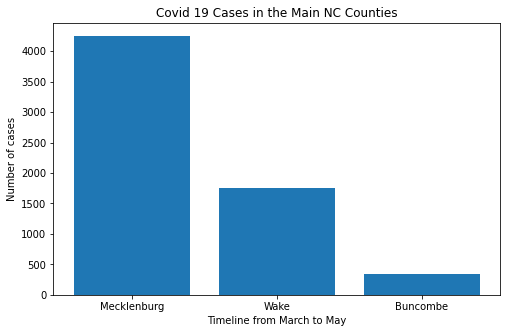

In [13]:
#Main Counties Bar Chart (Covid 19 Cases)
plt.figure(figsize=(8,5))
x_axis=["Mecklenburg","Wake","Buncombe"] 
y_axis= [MC, WC, BC]
plt.xlabel("Timeline from March to May")
plt.ylabel("Number of cases")
plt.title("Covid 19 Cases in the Main NC Counties")
plt.bar(x_axis,y_axis)
plt.savefig("Covid 19 Cases in NC.png")

In [14]:
#Covid related deaths in the main NC Cities
MD=Mecklenburg_['deaths']
WD=Wake_['deaths']
BD=Buncombe_['deaths']

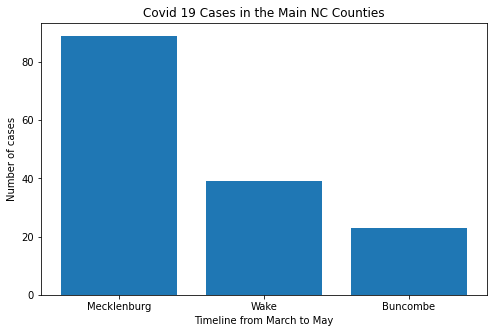

In [16]:
#Main Counties Bar Chart (Covid 19 Deaths)
#Main Counties Bar Chart (Covid 19 Cases)
plt.figure(figsize=(8,5))
x_axis=["Mecklenburg","Wake","Buncombe"] 
y_axis= [MD, WD, BD]
plt.xlabel("Timeline from March to May")
plt.ylabel("Number of cases")
plt.title("Covid 19 Cases in the Main NC Counties")
plt.bar(x_axis,y_axis)
plt.savefig("Covid 19 Deaths in NC.png")

In [17]:
Wake_County = CH_RA_AS_df[(CH_RA_AS_df['county'] == 'Wake')]
Wake_deaths = Wake_County['deaths'].max()
f' The total number of deaths since March to May in Wake County are {Wake_deaths} deaths'

' The total number of deaths since March to May in Wake County are 39.0 deaths'

In [18]:
Buncombe_County = CH_RA_AS_df[(CH_RA_AS_df['county'] == 'Buncombe')]
Buncombe_deaths = Buncombe_County['deaths'].max()
f' The total number of deaths since March to May in Buncombe County are {Buncombe_deaths} deaths'

' The total number of deaths since March to May in Buncombe County are 23.0 deaths'

In [19]:
Mecklenburg_County = CH_RA_AS_df[(CH_RA_AS_df['county'] == 'Mecklenburg')]
Mecklenburg_deaths = Mecklenburg_County['deaths'].max()
f'Mecklenburg The total number of deaths since March to May in Wake County are {Mecklenburg_deaths} deaths'

'Mecklenburg The total number of deaths since March to May in Wake County are 89.0 deaths'

In [20]:
Lat_Long={'Counties':['Mecklenburg','Wake','Buncombe'],
          'Lat':['35.2271','35.8032','35.6100'],
          'Lng':['-80.8431','-78.5661','-82.5300'],
         'Deaths':[Mecklenburg_deaths, Wake_deaths, Buncombe_deaths ]}
Counties_df = pd.DataFrame.from_dict(Lat_Long)
Counties_df["Lat"]=Counties_df.Lat.astype(float)
Counties_df["Lng"]=Counties_df.Lng.astype(float)
Counties_df["Deaths"]=Counties_df.Deaths.astype(float)
Counties_df

#weather["Temp"] = weather.Temp.astype(float)

,Counties,Lat,Lng,Deaths
0,Mecklenburg,35.2271,-80.8431,89.0
1,Wake,35.8032,-78.5661,39.0
2,Buncombe,35.6100,-82.5300,23.0


In [21]:
gmaps.configure(api_key=g_key)
locations=Counties_df[["Lat", "Lng"]]
weights_=Counties_df['Deaths']
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations,weights=weights_,max_intensity=50, point_radius=50))
fig

Figure(layout=FigureLayout(height='420px'))